# Продвинутая визуализация с Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык продвинутой визуализации и форматирования данных с помощью matplotlib. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-6, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

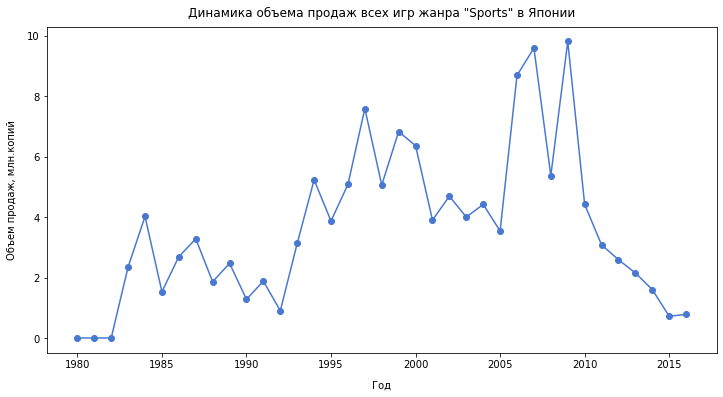

In [3]:
data = df[df['Genre'] == 'Sports'][['Year', 'JP_Sales']].groupby('Year').agg('sum')

plt.style.use('seaborn-muted')
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Динамика объема продаж всех игр жанра "Sports" в Японии', pad=10)
ax.set_xlabel('Год', labelpad=10)
ax.set_ylabel('Объем продаж, млн.копий', labelpad=10)

ax.plot(data.index, data['JP_Sales'], marker='o')

plt.show()

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

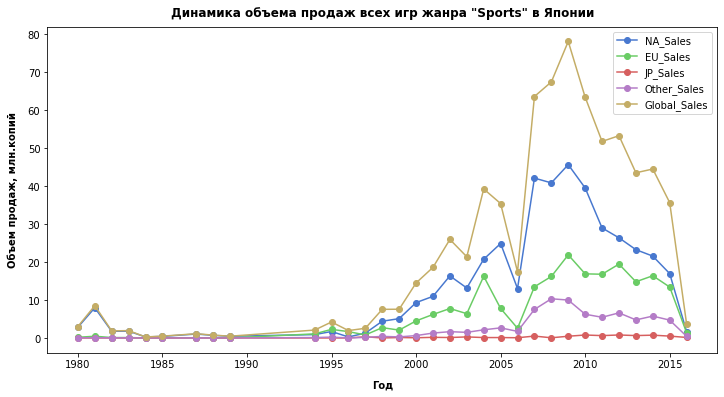

In [4]:
data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')

plt.style.use('seaborn-muted')
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Динамика объема продаж всех игр жанра "Sports" в Японии', pad=10, fontweight='bold')
ax.set_xlabel('Год', labelpad=10, fontweight='bold')
ax.set_ylabel('Объем продаж, млн.копий', labelpad=10, fontweight='bold')

ax.plot(data.index, data['NA_Sales'], marker='o', label='NA_Sales')
ax.plot(data.index, data['EU_Sales'], marker='o', label='EU_Sales')
ax.plot(data.index, data['JP_Sales'], marker='o', label='JP_Sales')
ax.plot(data.index, data['Other_Sales'], marker='o', label='Other_Sales')
ax.plot(data.index, data['Global_Sales'], marker='o', label='Global_Sales')
ax.legend()

plt.show()

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

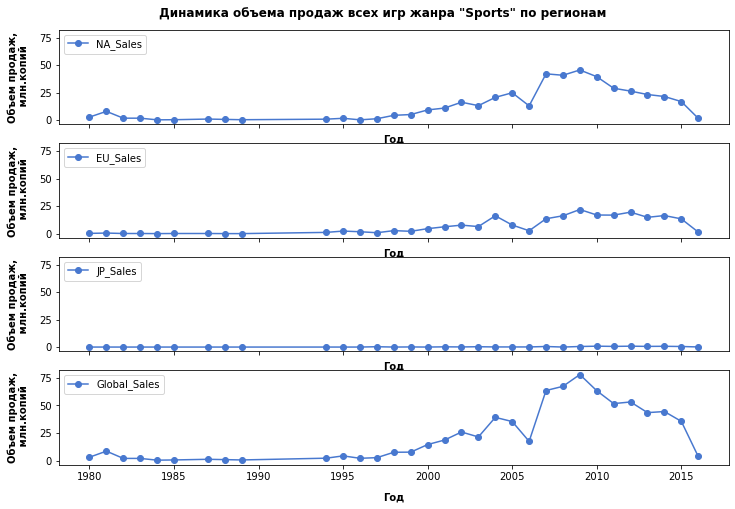

In [5]:
data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')
row_names = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

plt.style.use('seaborn-muted')
fig, ax = plt.subplots(figsize=(12, 8), nrows=len(row_names), sharex = True, sharey = True)

for i in range(len(row_names)):
    ax[i].set_xlabel('Год', labelpad=10, fontweight='bold')
    ax[i].set_ylabel('Объем продаж,\n млн.копий', labelpad=10, fontweight='bold')

    ax[i].plot(data.index, data[row_names[i]].round(1), marker='o', label=row_names[i])
    ax[i].legend(loc='upper left')

fig.suptitle('Динамика объема продаж всех игр жанра "Sports" по регионам', fontweight='bold', y=0.92)
plt.show()

### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

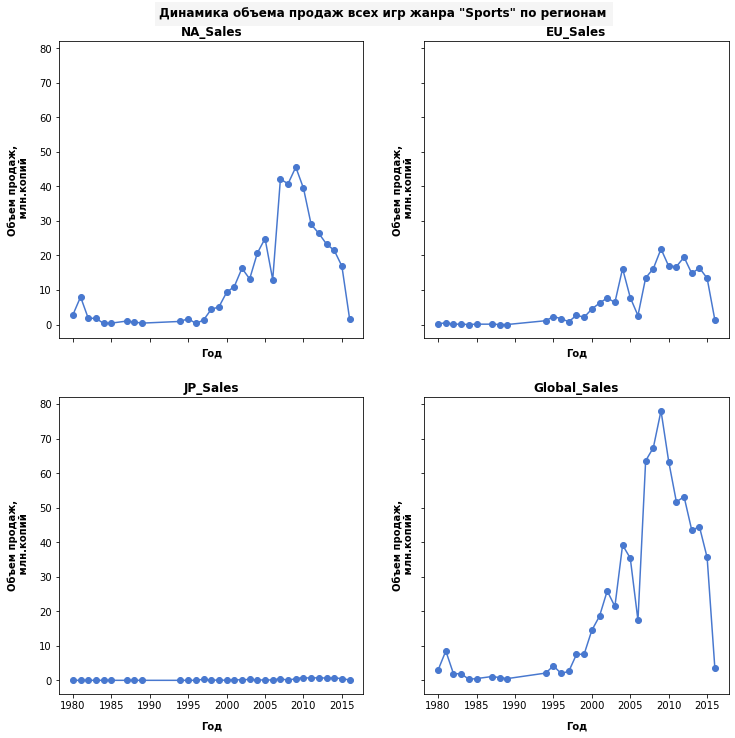

In [6]:
data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')
row_names = np.array(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']).reshape(2, 2)

plt.style.use('seaborn-muted')
fig, ax = plt.subplots(figsize=(12, 12), nrows=row_names.shape[0], ncols=row_names.shape[1], sharex = True, sharey = True)

for i in range(row_names.shape[0]):
    for j in range(row_names.shape[1]):
        ax[i][j].set_xlabel('Год', labelpad=10, fontweight='bold')
        ax[i][j].set_ylabel('Объем продаж,\n млн.копий', labelpad=10, fontweight='bold')
        ax[i][j].set_title(row_names[i][j], fontweight='bold')
        ax[i][j].plot(data.index, data[row_names[i][j]].round(1), marker='o', label=row_names[i][j])
#         ax[i][j].legend(loc='upper left')

fig.suptitle('Динамика объема продаж всех игр жанра "Sports" по регионам', fontweight='bold', y=0.92, backgroundcolor = 'whitesmoke')
plt.show()

### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

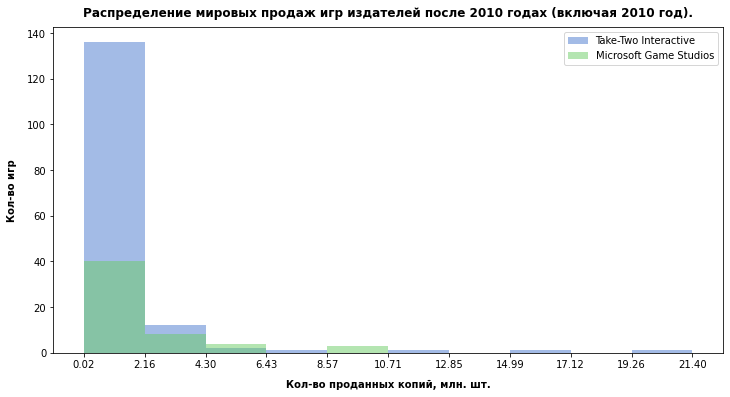

In [7]:
data1 = df[(df['Publisher'] == 'Microsoft Game Studios') & (df['Year'] >= 2010)]
data2 = df[(df['Publisher'] == 'Take-Two Interactive') & (df['Year'] >= 2010)]

fig, ax = plt.subplots(figsize=(12,6))
_, bins, _ = ax.hist(data2['Global_Sales'], label = 'Take-Two Interactive', alpha = 0.5)
ax.hist(data1['Global_Sales'], label = 'Microsoft Game Studios', alpha = 0.5, bins = bins)

ax.set_title('Распределение мировых продаж игр издателей после 2010 годах (включая 2010 год).', pad=10, fontweight='bold')
ax.set_xlabel('Кол-во проданных копий, млн. шт.', labelpad=10, fontweight='bold')
ax.set_ylabel('Кол-во игр', labelpad=10, fontweight='bold')
ax.set_xticks(list(bins))
ax.tick_params(axis = 'x', rotation = 0)
ax.legend()

plt.show()

### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

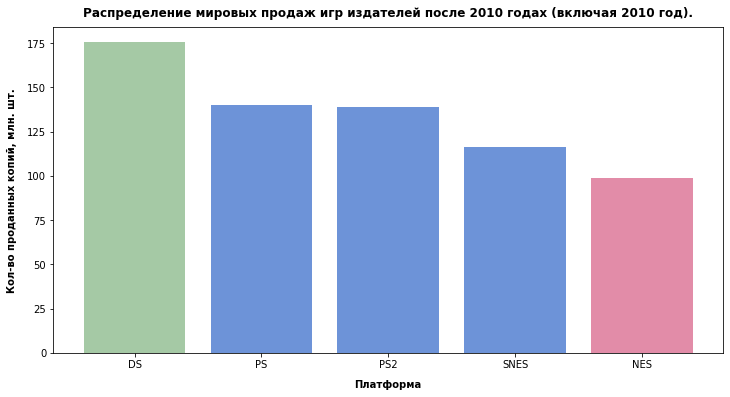

In [11]:
data = df.groupby('Platform')[['JP_Sales']].agg('sum').sort_values('JP_Sales', ascending=False).head()

fig, ax = plt.subplots(figsize=(12,6))
barc = ax.bar(data.index, height=data['JP_Sales'], alpha = 0.8)

ax.set_title('Распределение мировых продаж игр издателей после 2010 годах (включая 2010 год).', pad=10, fontweight='bold')
ax.set_xlabel('Платформа', labelpad=10, fontweight='bold')
ax.set_ylabel('Кол-во проданных копий, млн. шт.', labelpad=10, fontweight='bold')

barc.patches[0].set(facecolor='darkseagreen')
barc.patches[4].set(facecolor='palevioletred')

plt.show()



## Дополнительные (необязательные) задачи


### Задача 7

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

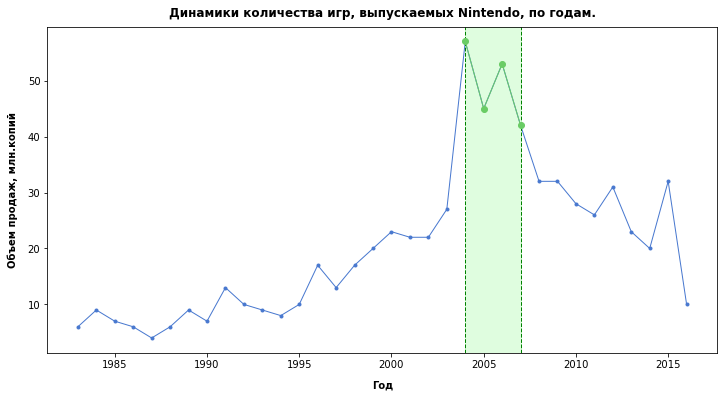

In [99]:
df['Count'] = 1
df.head()
data = df[df['Publisher'] == 'Nintendo'].groupby('Year').agg('sum')
data['More35'] = np.where(data['Count'] > 35, 1, 0)
# data[data['More35'] == 1]['Count']

fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Динамики количества игр, выпускаемых Nintendo, по годам.', pad=10, fontweight='bold')
ax.set_xlabel('Год', labelpad=10, fontweight='bold')
ax.set_ylabel('Объем продаж, млн.копий', labelpad=10, fontweight='bold')

ax.plot(data.index, data['Count'], marker='.', linewidth=1)
ax.axvline(x=data[data['More35'] == 1].index.min(), color='green', linewidth=1, linestyle='--')
ax.axvline(x=data[data['More35'] == 1].index.max(), color='green', linewidth=1, linestyle='--')
ax.axvspan(xmin=data[data['More35'] == 1].index.min(), xmax=data[data['More35'] == 1].index.max(), color = 'palegreen', alpha=0.3)
ax.plot(data[data['More35'] == 1].index, data[data['More35'] == 1]['Count'], marker='o', linewidth=1)

plt.show()

### Задача 8

Определите 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны

In [10]:
### YOUR CODE HERE ###
